# 1. I1mporting Libraries

In [44]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import learning_curve
from xgboost import XGBRFRegressor

from feature_engine.datetime import DatetimeFeatures
import pickle
import matplotlib.pyplot as plt

# 2. Display Settings

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
sklearn.set_config(transform_output="pandas")

# 3. Getting a data

In [4]:
train_df=pd.read_csv("data/train.csv")
val_df=pd.read_csv("data/Val.csv")
test_df=pd.read_csv("data/Test.csv")

In [5]:
train_df

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Multiple Carriers,2019-06-09,Delhi,Cochin,04:55:00,12:35:00,460,1.0,No Info,10877
1,Air India,2019-03-27,Delhi,Cochin,17:40:00,08:15:00,875,1.0,No Info,5998
2,Air India,2019-05-24,Kolkata,Banglore,14:35:00,14:35:00,1440,1.0,No Info,6528
3,Multiple Carriers,2019-06-09,Delhi,Cochin,09:45:00,16:10:00,385,1.0,No Info,9646
4,Indigo,2019-05-15,Delhi,Cochin,11:25:00,01:30:00,845,1.0,No Info,6979
...,...,...,...,...,...,...,...,...,...,...
635,Indigo,2019-05-24,Chennai,Kolkata,14:45:00,17:05:00,140,0.0,No Info,3858
636,Indigo,2019-06-09,Mumbai,Hyderabad,09:10:00,10:40:00,90,0.0,No Info,4049
637,Jet Airways,2019-03-24,Kolkata,Banglore,06:30:00,18:10:00,700,1.0,No Info,13759
638,Vistara,2019-05-01,Kolkata,Banglore,17:00:00,18:50:00,1550,1.0,No Info,8610


In [6]:
val_df

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-27,Delhi,Cochin,19:10:00,04:25:00,1995,2.0,No Info,10929
1,Jet Airways,2019-06-12,Delhi,Cochin,18:20:00,12:35:00,1095,2.0,No Info,14300
2,Jet Airways,2019-03-18,Banglore,New Delhi,22:50:00,20:20:00,1290,1.0,In-flight meal not included,11087
3,Jet Airways,2019-05-12,Banglore,Delhi,08:20:00,11:20:00,180,0.0,In-flight meal not included,6144
4,Spicejet,2019-03-24,Chennai,Kolkata,09:30:00,12:05:00,155,0.0,No check-in baggage included,3807
...,...,...,...,...,...,...,...,...,...,...
155,Multiple Carriers,2019-05-27,Delhi,Cochin,09:00:00,19:00:00,600,1.0,No Info,10407
156,Jet Airways,2019-06-03,Delhi,Cochin,19:45:00,12:35:00,1010,1.0,In-flight meal not included,10262
157,Air India,2019-03-15,Banglore,New Delhi,08:15:00,21:25:00,790,1.0,No Info,6046
158,Indigo,2019-03-21,Delhi,Cochin,14:30:00,17:35:00,185,0.0,No Info,5406


In [7]:
test_df

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Multiple Carriers,2019-05-21,Delhi,Cochin,13:00:00,01:30:00,750,1.0,No Info,7888
1,Jet Airways,2019-06-06,Delhi,Cochin,16:00:00,04:25:00,745,1.0,In-flight meal not included,10262
2,Air India,2019-03-09,Banglore,New Delhi,05:50:00,22:45:00,1015,1.0,No Info,10657
3,Air India,2019-05-09,Delhi,Cochin,06:05:00,09:25:00,1640,1.0,No Info,7480
4,Air India,2019-06-01,Delhi,Cochin,07:00:00,19:15:00,735,1.0,No Info,9929
...,...,...,...,...,...,...,...,...,...,...
195,Air India,2019-03-21,Delhi,Cochin,20:40:00,09:25:00,765,1.0,No Info,5642
196,Jet Airways,2019-06-27,Delhi,Cochin,13:25:00,19:00:00,1775,2.0,No Info,15339
197,Indigo,2019-06-27,Banglore,Delhi,18:55:00,21:50:00,175,0.0,No Info,4990
198,Indigo,2019-03-21,Delhi,Cochin,07:20:00,12:30:00,310,1.0,No Info,6388


# 3.1 Split the data

In [8]:
def split_data(data):
    X=data.iloc[:,:-1]
    y=data.iloc[:,-1]
    return (X,y)

In [9]:
X_train,y_train=split_data(train_df)

In [10]:
X_train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info
0,Multiple Carriers,2019-06-09,Delhi,Cochin,04:55:00,12:35:00,460,1.0,No Info
1,Air India,2019-03-27,Delhi,Cochin,17:40:00,08:15:00,875,1.0,No Info
2,Air India,2019-05-24,Kolkata,Banglore,14:35:00,14:35:00,1440,1.0,No Info
3,Multiple Carriers,2019-06-09,Delhi,Cochin,09:45:00,16:10:00,385,1.0,No Info
4,Indigo,2019-05-15,Delhi,Cochin,11:25:00,01:30:00,845,1.0,No Info
...,...,...,...,...,...,...,...,...,...
635,Indigo,2019-05-24,Chennai,Kolkata,14:45:00,17:05:00,140,0.0,No Info
636,Indigo,2019-06-09,Mumbai,Hyderabad,09:10:00,10:40:00,90,0.0,No Info
637,Jet Airways,2019-03-24,Kolkata,Banglore,06:30:00,18:10:00,700,1.0,No Info
638,Vistara,2019-05-01,Kolkata,Banglore,17:00:00,18:50:00,1550,1.0,No Info


In [11]:
y_train

0      10877
1       5998
2       6528
3       9646
4       6979
       ...  
635     3858
636     4049
637    13759
638     8610
639    14231
Name: price, Length: 640, dtype: int64

In [12]:
X_val,y_val=split_data(val_df)

In [13]:
X_val

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info
0,Jet Airways,2019-03-27,Delhi,Cochin,19:10:00,04:25:00,1995,2.0,No Info
1,Jet Airways,2019-06-12,Delhi,Cochin,18:20:00,12:35:00,1095,2.0,No Info
2,Jet Airways,2019-03-18,Banglore,New Delhi,22:50:00,20:20:00,1290,1.0,In-flight meal not included
3,Jet Airways,2019-05-12,Banglore,Delhi,08:20:00,11:20:00,180,0.0,In-flight meal not included
4,Spicejet,2019-03-24,Chennai,Kolkata,09:30:00,12:05:00,155,0.0,No check-in baggage included
...,...,...,...,...,...,...,...,...,...
155,Multiple Carriers,2019-05-27,Delhi,Cochin,09:00:00,19:00:00,600,1.0,No Info
156,Jet Airways,2019-06-03,Delhi,Cochin,19:45:00,12:35:00,1010,1.0,In-flight meal not included
157,Air India,2019-03-15,Banglore,New Delhi,08:15:00,21:25:00,790,1.0,No Info
158,Indigo,2019-03-21,Delhi,Cochin,14:30:00,17:35:00,185,0.0,No Info


In [14]:
y_val

0      10929
1      14300
2      11087
3       6144
4       3807
       ...  
155    10407
156    10262
157     6046
158     5406
159     4995
Name: price, Length: 160, dtype: int64

In [15]:
X_test,y_test=split_data(test_df)

In [16]:
X_test

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info
0,Multiple Carriers,2019-05-21,Delhi,Cochin,13:00:00,01:30:00,750,1.0,No Info
1,Jet Airways,2019-06-06,Delhi,Cochin,16:00:00,04:25:00,745,1.0,In-flight meal not included
2,Air India,2019-03-09,Banglore,New Delhi,05:50:00,22:45:00,1015,1.0,No Info
3,Air India,2019-05-09,Delhi,Cochin,06:05:00,09:25:00,1640,1.0,No Info
4,Air India,2019-06-01,Delhi,Cochin,07:00:00,19:15:00,735,1.0,No Info
...,...,...,...,...,...,...,...,...,...
195,Air India,2019-03-21,Delhi,Cochin,20:40:00,09:25:00,765,1.0,No Info
196,Jet Airways,2019-06-27,Delhi,Cochin,13:25:00,19:00:00,1775,2.0,No Info
197,Indigo,2019-06-27,Banglore,Delhi,18:55:00,21:50:00,175,0.0,No Info
198,Indigo,2019-03-21,Delhi,Cochin,07:20:00,12:30:00,310,1.0,No Info


In [17]:
y_test

0       7888
1      10262
2      10657
3       7480
4       9929
       ...  
195     5642
196    15339
197     4990
198     6388
199    10877
Name: price, Length: 200, dtype: int64

# 3.2 Meta info

In [18]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          640 non-null    object 
 1   date_of_journey  640 non-null    object 
 2   source           640 non-null    object 
 3   destination      640 non-null    object 
 4   dep_time         640 non-null    object 
 5   arrival_time     640 non-null    object 
 6   duration         640 non-null    int64  
 7   total_stops      640 non-null    float64
 8   additional_info  640 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 45.1+ KB


# 4. Data preprocessing

In [19]:
dt_cols=["date_of_journey","dep_time","arrival_time"]
num_cols=["duration","total_stops"]

cat_cols=[col for col in X_train.columns if (col not in dt_cols) and (col not in num_cols)]

In [20]:
cat_cols

['airline', 'source', 'destination', 'additional_info']

In [25]:
num_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])

cat_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(sparse_output=False))
])

doj_transformer= Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('extractor',DatetimeFeatures(features_to_extract=['month','week','day_of_week','day_of_month'])),
    ('scaler',StandardScaler())
])

time_transformer= Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('extractor',DatetimeFeatures(features_to_extract=['hour','minute'])),
    ('scaler',StandardScaler())
])



In [26]:
preprocessor=ColumnTransformer(transformers=[
    ('num',num_pipe,num_cols),
    ('cat',cat_pipe,cat_cols),
    ('doj',doj_transformer,['date_of_journey']),
    ('time',time_transformer,['dep_time','arrival_time'])
])

In [27]:
preprocessor.fit_transform(X_train)

C:\Users\VIJAY\AppData\Local\Programs\Python\Python313\Lib\site-packages\feature_engine\variable_handling\_variable_type_checks.py:32: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  return is_numeric(pd.to_numeric(column, errors="ignore"))
C:\Users\VIJAY\AppData\Local\Programs\Python\Python313\Lib\site-packages\feature_engine\variable_handling\_variable_type_checks.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  return is_datetime(pd.to_datetime(column, errors="ignore", utc=True))
C:\Users\VIJAY\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The DatetimeFeatures or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.

AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [34]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


# Define custom DatetimeFeatures class (not provided in scikit-learn)
class DatetimeFeatures:
    def __init__(self, features_to_extract):
        self.features_to_extract = features_to_extract

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = pd.to_datetime(X)  # Ensure datetime format
        features = {}
        for feature in self.features_to_extract:
            if feature == 'month':
                features[feature] = X.dt.month
            elif feature == 'week':
                features[feature] = X.dt.isocalendar().week
            elif feature == 'day_of_week':
                features[feature] = X.dt.dayofweek
            elif feature == 'day_of_month':
                features[feature] = X.dt.day
            elif feature == 'hour':
                features[feature] = X.dt.hour
            elif feature == 'minute':
                features[feature] = X.dt.minute
        return pd.DataFrame(features)


# Create pipelines for each data type
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

doj_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('extractor', DatetimeFeatures(features_to_extract=['month', 'week', 'day_of_week', 'day_of_month'])),
    ('scaler', StandardScaler())
])

time_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('extractor', DatetimeFeatures(features_to_extract=['hour', 'minute'])),
    ('scaler', StandardScaler())
])

# Create the ColumnTransformer to combine pipelines
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols),
    ('doj', doj_transformer, ['date_of_journey']),
    ('time', time_transformer, ['dep_time', 'arrival_time'])
], remainder='drop')  # or passthrough or drop

In [35]:
preprocessor.fit_transform(X_train)

ValueError: to assemble mappings requires at least that [year, month, day] be specified: [day,month,year] is missing

In [36]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


# Define custom DatetimeFeatures class
class DatetimeFeatures:
    def __init__(self, features_to_extract):
        self.features_to_extract = features_to_extract

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Convert to DataFrame if it's a Series
        if isinstance(X, pd.Series):
            X = pd.DataFrame(X)

        # Ensure datetime format with error handling
        for col in X.columns:
            try:
                X[col] = pd.to_datetime(X[col], errors='raise')
            except (pd.errors.OutOfBoundsDatetime, pd.errors.ParserError):
                # Handle invalid dates (e.g., impute with most frequent value)
                X[col] = pd.to_datetime(X[col], errors='coerce')  # or other handling

        features = {}
        for feature in self.features_to_extract:
            if feature == 'month':
                features[feature] = X[X.columns[0]].dt.month
            elif feature == 'week':
                features[feature] = X[X.columns[0]].dt.isocalendar().week
            elif feature == 'day_of_week':
                features[feature] = X[X.columns[0]].dt.dayofweek
            elif feature == 'day_of_month':
                features[feature] = X[X.columns[0]].dt.day
            elif feature == 'hour':
                features[feature] = X[X.columns[0]].dt.hour
            elif feature == 'minute':
                features[feature] = X[X.columns[0]].dt.minute

        return pd.DataFrame(features)


# Define your numerical and categorical columns
# Replace with your actual column names
num_cols = ['numerical_col1', 'numerical_col2', ...]  
cat_cols = ['categorical_col1', 'categorical_col2', ...] 

# Create pipelines for each data type
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

doj_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('extractor', DatetimeFeatures(features_to_extract=['month', 'week', 'day_of_week', 'day_of_month'])),
    ('scaler', StandardScaler())
])

time_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('extractor', DatetimeFeatures(features_to_extract=['hour', 'minute'])),
    ('scaler', StandardScaler())
])

# Create the ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols),
    ('doj', doj_transformer, ['date_of_journey']),
    ('time', time_transformer, ['dep_time', 'arrival_time'])
], remainder='drop')  # or passthrough or drop

# Apply the preprocessor
# Assuming X_train is your training data DataFrame
processed_data = preprocessor.fit_transform(X_train)

ValueError: No valid specification of the columns. Only a scalar, list or slice of all integers or all strings, or boolean mask is allowed

In [37]:
import pandas as pd
import numpy as np  # Import numpy for dtype_include
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector  # Import make_column_selector


class DatetimeFeatures:
    def __init__(self, features_to_extract):
        self.features_to_extract = features_to_extract

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Convert to DataFrame if it's a Series
        if isinstance(X, pd.Series):
            X = pd.DataFrame(X)

        # Ensure datetime format with error handling
        for col in X.columns:
            try:
                X[col] = pd.to_datetime(X[col], errors='raise')
            except (pd.errors.OutOfBoundsDatetime, pd.errors.ParserError):
                # Handle invalid dates (e.g., impute with most frequent value)
                X[col] = pd.to_datetime(X[col], errors='coerce')

        features = {}
        for feature in self.features_to_extract:
            if feature == 'month':
                features[feature] = X[X.columns[0]].dt.month
            elif feature == 'week':
                features[feature] = X[X.columns[0]].dt.isocalendar().week
            elif feature == 'day_of_week':
                features[feature] = X[X.columns[0]].dt.dayofweek
            elif feature == 'day_of_month':
                features[feature] = X[X.columns[0]].dt.day
            elif feature == 'hour':
                features[feature] = X[X.columns[0]].dt.hour
            elif feature == 'minute':
                features[feature] = X[X.columns[0]].dt.minute

        return pd.DataFrame(features)


# Create pipelines
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

doj_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('extractor', DatetimeFeatures(features_to_extract=['month', 'week', 'day_of_week', 'day_of_month'])),
    ('scaler', StandardScaler())
])

time_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('extractor', DatetimeFeatures(features_to_extract=['hour', 'minute'])),
    ('scaler', StandardScaler())
])

# Create the ColumnTransformer with make_column_selector
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, make_column_selector(dtype_include=np.number)),
        ('cat', cat_transformer, make_column_selector(dtype_include=object)),
        ('doj', doj_transformer, ['date_of_journey']),
        ('time', time_transformer, ['dep_time', 'arrival_time'])
    ],
    remainder='drop'  # or passthrough or drop
)

# Apply the preprocessor
processed_data = preprocessor.fit_transform(X_train)

C:\Users\VIJAY\AppData\Local\Temp\ipykernel_30444\2428619226.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col], errors='raise')
C:\Users\VIJAY\AppData\Local\Temp\ipykernel_30444\2428619226.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col], errors='raise')


In [38]:
processed_data

,num__duration,num__total_stops,cat__airline_Air Asia,cat__airline_Air India,cat__airline_Goair,cat__airline_Indigo,cat__airline_Jet Airways,cat__airline_Multiple Carriers,cat__airline_Spicejet,cat__airline_Vistara,cat__date_of_journey_2019-03-01,cat__date_of_journey_2019-03-03,cat__date_of_journey_2019-03-06,cat__date_of_journey_2019-03-09,cat__date_of_journey_2019-03-12,cat__date_of_journey_2019-03-15,cat__date_of_journey_2019-03-18,cat__date_of_journey_2019-03-21,cat__date_of_journey_2019-03-24,cat__date_of_journey_2019-03-27,cat__date_of_journey_2019-04-01,cat__date_of_journey_2019-04-03,cat__date_of_journey_2019-04-06,cat__date_of_journey_2019-04-09,cat__date_of_journey_2019-04-12,cat__date_of_journey_2019-04-15,cat__date_of_journey_2019-04-18,cat__date_of_journey_2019-04-21,cat__date_of_journey_2019-04-24,cat__date_of_journey_2019-04-27,cat__date_of_journey_2019-05-01,cat__date_of_journey_2019-05-03,cat__date_of_journey_2019-05-06,cat__date_of_journey_2019-05-09,cat__date_of_journey_2019-05-12,cat__date_of_journey_2019-05-15,cat__date_of_journey_2019-05-18,cat__date_of_journey_2019-05-21,cat__date_of_journey_2019-05-24,cat__date_of_journey_2019-05-27,cat__date_of_journey_2019-06-01,cat__date_of_journey_2019-06-03,cat__date_of_journey_2019-06-06,cat__date_of_journey_2019-06-09,cat__date_of_journey_2019-06-12,cat__date_of_journey_2019-06-15,cat__date_of_journey_2019-06-18,cat__date_of_journey_2019-06-21,cat__date_of_journey_2019-06-24,cat__date_of_journey_2019-06-27,cat__source_Banglore,cat__source_Chennai,cat__source_Delhi,cat__source_Kolkata,cat__source_Mumbai,cat__destination_Banglore,cat__destination_Cochin,cat__destination_Delhi,cat__destination_Hyderabad,cat__destination_Kolkata,cat__destination_New Delhi,cat__dep_time_00:30:00,cat__dep_time_00:40:00,cat__dep_time_01:30:00,cat__dep_time_02:05:00,cat__dep_time_02:15:00,cat__dep_time_02:35:00,cat__dep_time_02:55:00,cat__dep_time_03:50:00,cat__dep_time_04:00:00,cat__dep_time_04:40:00,cat__dep_time_04:45:00,cat__dep_time_04:55:00,cat__dep_time_05:05:00,cat__dep_time_05:10:00,cat__dep_time_05:15:00,cat__dep_time_05:25:00,cat__dep_time_05:30:00,cat__dep_time_05:35:00,cat__dep_time_05:40:00,cat__dep_time_05:45:00,cat__dep_time_05:50:00,cat__dep_time_05:55:00,cat__dep_time_06:00:00,cat__dep_time_06:05:00,cat__dep_time_06:10:00,cat__dep_time_06:20:00,cat__dep_time_06:30:00,cat__dep_time_06:40:00,cat__dep_time_06:45:00,cat__dep_time_06:50:00,cat__dep_time_06:55:00,cat__dep_time_07:00:00,cat__dep_time_07:05:00,cat__dep_time_07:10:00,cat__dep_time_07:30:00,cat__dep_time_07:35:00,cat__dep_time_07:45:00,cat__dep_time_07:55:00,cat__dep_time_08:00:00,cat__dep_time_08:10:00,cat__dep_time_08:15:00,cat__dep_time_08:20:00,cat__dep_time_08:25:00,cat__dep_time_08:30:00,cat__dep_time_08:35:00,cat__dep_time_08:45:00,cat__dep_time_08:50:00,cat__dep_time_08:55:00,cat__dep_time_09:00:00,cat__dep_time_09:10:00,cat__dep_time_09:15:00,cat__dep_time_09:25:00,cat__dep_time_09:30:00,cat__dep_time_09:35:00,cat__dep_time_09:40:00,cat__dep_time_09:45:00,cat__dep_time_09:50:00,cat__dep_time_09:55:00,cat__dep_time_10:00:00,cat__dep_time_10:10:00,cat__dep_time_10:20:00,cat__dep_time_10:30:00,cat__dep_time_10:35:00,cat__dep_time_10:45:00,cat__dep_time_10:55:00,cat__dep_time_11:00:00,cat__dep_time_11:05:00,cat__dep_time_11:10:00,cat__dep_time_11:15:00,cat__dep_time_11:25:00,cat__dep_time_11:30:00,cat__dep_time_11:35:00,cat__dep_time_11:40:00,cat__dep_time_11:45:00,cat__dep_time_11:50:00,cat__dep_time_11:55:00,cat__dep_time_12:00:00,cat__dep_time_12:10:00,cat__dep_time_12:30:00,cat__dep_time_12:50:00,cat__dep_time_12:55:00,cat__dep_time_13:00:00,cat__dep_time_13:10:00,cat__dep_time_13:15:00,cat__dep_time_13:20:00,cat__dep_time_13:25:00,cat__dep_time_13:30:00,cat__dep_time_13:55:00,cat__dep_time_14:05:00,cat__dep_time_14:10:00,cat__dep_time_14:15:00,cat__dep_time_14:20:00,cat__dep_time_14:25:00,cat__dep_time_14:35:00,cat__dep_time_14:40:00,cat__dep_time_14:45:00,cat__dep_time_14:55:00,cat__dep_time_15:00:00,c

# 5. Model Selection

In [41]:
algorithms={
    'Linear Regression': LinearRegression(),
    "Support Vector Machine" : SVR(),
    'Random Forest' : RandomForestRegressor(n_estimators=10),
    'XG Boost': XGBRFRegressor(n_estimators=10)
}

In [45]:
data = pd.concat([train_df, val_df], axis=0)

X_data, y_data = split_data(data)
print(X_data.shape, y_data.shape)

(800, 9) (800,)


In [46]:
def plot_curves(sizes, mean_scores, std_scores, label, ax):
	ax.plot(
		sizes,
		mean_scores,
		marker="o",
		label=label
	)

	ax.fill_between(
		x=sizes,
		y1=mean_scores - std_scores,
		y2=mean_scores + std_scores,
		alpha=0.5
	)

In [47]:
def plot_learning_curves(name, algorithm, figsize=(12, 4)):
	model = Pipeline(steps=[
		("pre", preprocessor),
		("alg", algorithm)
	])

	train_sizes, train_scores, test_scores = learning_curve(
		estimator=model,
		X=X_data,
		y=y_data,
		cv=3,
		scoring="r2",
		n_jobs=-1,
		random_state=42
	)
	
	mean_train_scores = np.mean(train_scores, axis=1)
	std_train_scores = np.std(train_scores, axis=1)
	train_score = f"{mean_train_scores[-1]:.2f} +/- {std_train_scores[-1]:.2f}"

	mean_test_scores = np.mean(test_scores, axis=1)
	std_test_scores = np.std(test_scores, axis=1)
	test_score = f"{mean_test_scores[-1]:.2f} +/- {std_test_scores[-1]:.2f}"

	fig, ax = plt.subplots(figsize=figsize)

	# training curve
	plot_curves(
		train_sizes,
		mean_train_scores,
		std_train_scores,
		f"Train ({train_score})",
		ax
	)

	# test curve
	plot_curves(
		train_sizes,
		mean_test_scores,
		std_test_scores,
		f"Test ({test_score})",
		ax
	)

	ax.set(xlabel="Training Set Size", ylabel="R-square", title=name)

	ax.legend(loc="lower right")

	plt.show()


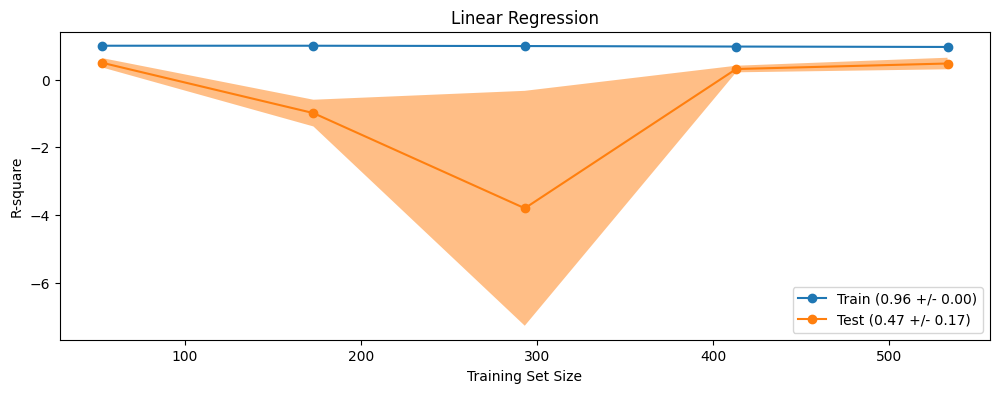

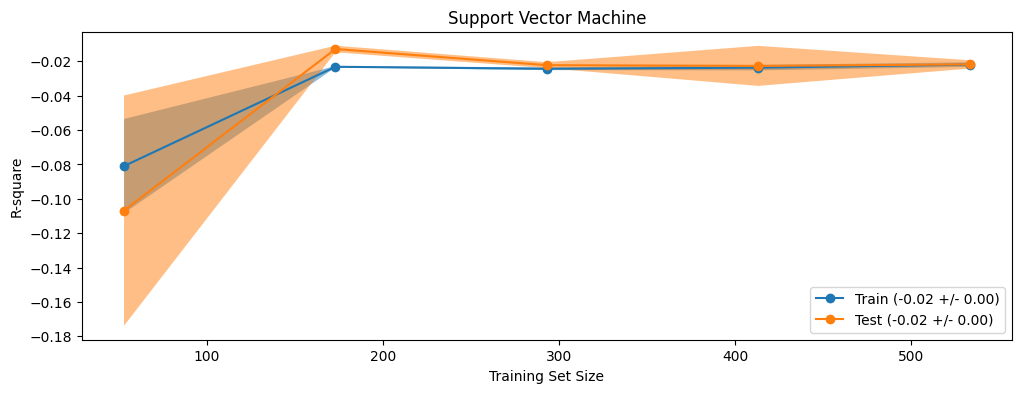

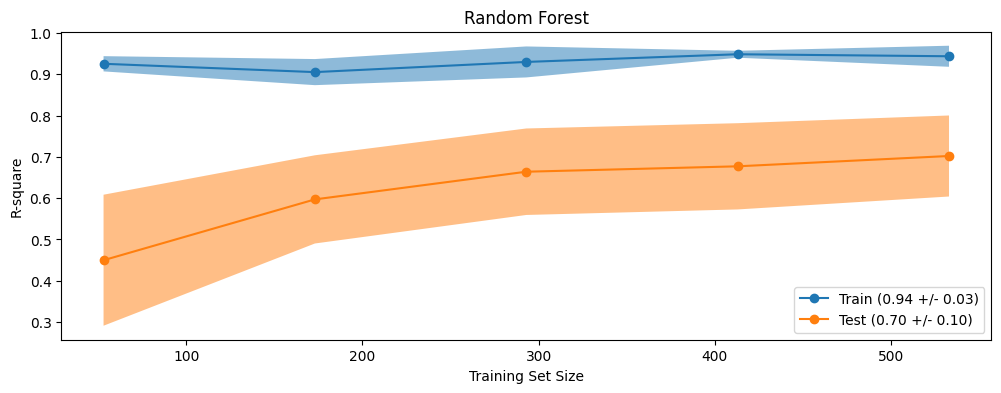

C:\Users\VIJAY\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The XGBRFRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
C:\Users\VIJAY\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
2 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
-----------------------------------------------------

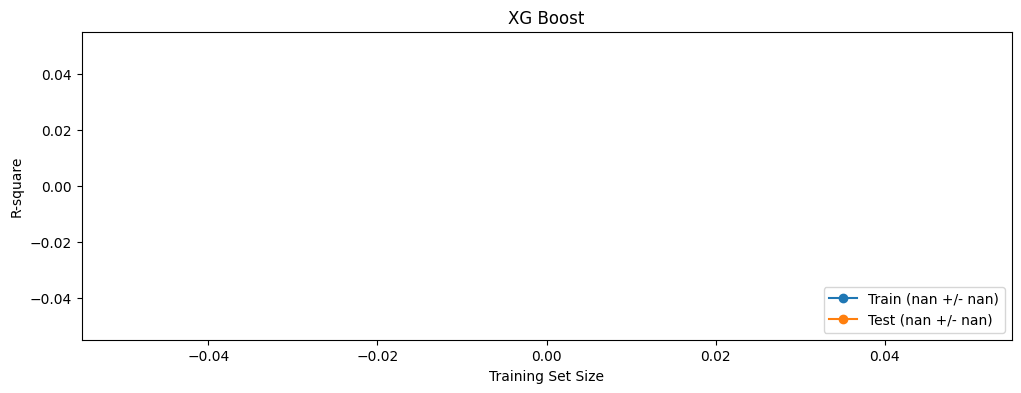

In [48]:
for name, alg in algorithms.items():
	plot_learning_curves(name, alg)

# 6. Model Training

In [49]:
model = Pipeline(steps=[
	("pre", preprocessor),
	("rf", RandomForestRegressor(n_estimators=10))
])

In [50]:
model.fit(X_data, y_data)

C:\Users\VIJAY\AppData\Local\Temp\ipykernel_30444\2428619226.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col], errors='raise')
C:\Users\VIJAY\AppData\Local\Temp\ipykernel_30444\2428619226.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col], errors='raise')


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000022A5B195A90>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unkn...
                                                                   <__main__.DatetimeFeatures object at 0x0000022A5B194D70>),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['date_of_journey']),
                                                 ('time',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('extractor',
                                                                   <__main__.DatetimeFeatures object at 0x0000022A5D66E490>),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['dep_time',
                                                   'arrival_time'])])),
                ('rf', RandomForestRegressor(n_estimators=10))])

In [51]:
def evaluate_model(X, y):
	y_pred = model.predict(X)
	return r2_score(y, y_pred)

In [52]:
print(f"R2 score on Training data is = {evaluate_model(X_data, y_data)}")

R2 score on Training data is = 0.941028226974853


C:\Users\VIJAY\AppData\Local\Temp\ipykernel_30444\2428619226.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col], errors='raise')
C:\Users\VIJAY\AppData\Local\Temp\ipykernel_30444\2428619226.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col], errors='raise')


In [53]:
print(f"R2 score on Test data is = {evaluate_model(X_test, y_test)}")

R2 score on Test data is = 0.7920475656682657


C:\Users\VIJAY\AppData\Local\Temp\ipykernel_30444\2428619226.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col], errors='raise')
C:\Users\VIJAY\AppData\Local\Temp\ipykernel_30444\2428619226.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col], errors='raise')


# 8 Model Persistence

In [54]:
import joblib

In [55]:
joblib.dump(model, "model.joblib")

PicklingError: Can't pickle <class '__main__.DatetimeFeatures'>: it's not the same object as __main__.DatetimeFeatures

In [56]:
import pickle

# Save the model
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

# Load the model
with open("model.pkl", "rb") as f:
    saved_model = pickle.load(f)
saved_model


PicklingError: Can't pickle <class '__main__.DatetimeFeatures'>: it's not the same object as __main__.DatetimeFeatures

In [60]:
import dill

    # Save the model
with open("model.pkl", "wb") as f:
        dill.dump(model, f)

    # Load the model
with open("model.pkl", "rb") as f:
        loaded_model = dill.load(f)

In [59]:
pip install dill

Note: you may need to restart the kernel to use updated packages.


In [61]:
loaded_model

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000022A20E406B0>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unkn...
                                                                   <__main__.DatetimeFeatures object at 0x0000022A5F6BE7B0>),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['date_of_journey']),
                                                 ('time',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('extractor',
                                                                   <__main__.DatetimeFeatures object at 0x0000022A5F187250>),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['dep_time',
                                                   'arrival_time'])])),
                ('rf', RandomForestRegressor(n_estimators=10))])

In [63]:

y_pred = loaded_model.predict(X_test)

r2_score(y_test, y_pred)


C:\Users\VIJAY\AppData\Local\Temp\ipykernel_30444\2428619226.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col], errors='raise')
C:\Users\VIJAY\AppData\Local\Temp\ipykernel_30444\2428619226.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[col] = pd.to_datetime(X[col], errors='raise')


0.7920475656682657